<a href="https://colab.research.google.com/github/cct99/DataScienceProject/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initial Report**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Food Demand Forecasting
Written by the students of CSC 4260-001 - Spring 2023:



# **1- Problem**
#The Importance of Precise Demand Forecasting


Food demand forecasting involves collecting and analyzing historical sales data to predict customer demand in a specific time frame. Accurate demand forecasting considers factors that can impact demand. This proactive approach allows manufacturers to respond to market changes in real-time.


Precise demand forecasting is crucial for food and beverage manufacturers as it determines the appropriate amount of a product to be produced at the right time. It plays a crucial role in advanced planning, supply chain planning, and inventory management by providing data for creating master production schedules. With an understanding of customer demand, manufacturers can determine the necessary ingredients to meet demand.


Accurate forecasting eliminates the uncertainty involved in planning for the future, giving manufacturers the assurance to produce for the future without worrying about ingredient waste, food waste, or expired products remaining on shelves. The effects of effective demand management can improve operations on the shop floor by increasing service levels.


For instance, demand forecasts for food and beverage facilities with multiple products can simplify the allocation of ingredients and resources for production, ensuring that both long-term and urgent orders are fulfilled, satisfying a diverse customer base.


The limited shelf life of ingredients in the industry makes any miscalculation result in overstocking or stock shortages. Overstocking leads to the waste of ingredients that are near their expiration date, while stock shortages result in missed customer orders, reduced service levels, and potential loss of customers because it could push them to seek solutions from your competitors. Accurate demand management is necessary to achieve the right balance and optimize demand forecasting and management processes. 


Our measure of success would be to have an accurate prediction for the number of orders the warehouse need for a period of time (a week). 


In [ ]:
# This block of code was writtten by: Mohammed Alturki, Ahmed Kashif, ChernChao Tai, Sho Sakane

# importing neccessary libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import datetime
import csv
from scipy import stats
# new
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
import io

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




Our data contains these files:
Weekly Demand data (train.csv): Historical data of demand for a product-center combination (Weeks: 1 to 145)
Meal_info.csv: Product(Meal) features such as category, sub-category, current price and discount
Fulfilment_center_info.csv: Information for fulfillment center like center area, city information etc.

In [ ]:
# This block of code was writtten by: Mohammed Alturki
# exporting and storing our datasets within our dataframes
df_meal = pd.read_csv('/content/drive/MyDrive/Food Demand Forecasting/meal_info.csv')
df_center = pd.read_csv('/content/drive/MyDrive/Food Demand Forecasting/fulfilment_center_info.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Food Demand Forecasting/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Food Demand Forecasting/test.csv')

# **2- EDA**

The datasets we will be using are: 

1- Weekly Demand data (train.csv): Historical data of demand for a product-center combination (Weeks: 1 to 145) 

2- Meal_info.csv: Product(Meal) features such as category, sub-category, current price and discount 

3- Fulfilment_center_info.csv: Information for fulfillment center like center area, city information etc.



We did some methods to check for any missing or incorrect data, but found none, so no cleaning was needed. We also checked for any duplicate data within our dataset and found none, so no imputation was required. And the data is all in one formant, so when merging there will not be any data wrangling neccessary. 

The tool we used extract our data is using pandas, we created our dataframe and read the csv file into it.
We used the isnull option to check for any missing data.

For our visulization we used bar chart to represent the number of categories within our Meal_info datset. And we used a pie graph to visualize the percentages of cuisins.
For the Fulfilment_center_info dataset we plottted the center type using a bar graph. 
We also printed a text description of our data to better understand what it contains.

For detecting outliers we used both a box plot and a scatter plot. It showed one data as an outlier compared to the rest of the data. However, after doing some research on the data and trying to figure out if it is an outlier, we found out that it was indeed an outlier but it was a normal one, it was not incorrect or entered miscorrectly. So imputating it would mean losing a piece of our data, so we decided on keeping it since it was a normal outlier. 


For our training data, we used a correlation matrix to descover the relationships and petters of the variables. And we used bar graphs to plot the distrubition of both base and checkout price varibles. 
We also used a box plot to detect outliers or anomalios and did not find any abnormal outliers, they were all normal within our dataset.

# Describing the data

In [ ]:
# This block of code was writtten by: Mohammed Alturki, Ahmed Kashif
print("The Shape of Demand dataset :",df_train.shape)
print("The Shape of Fulmilment Center Information dataset :",df_center.shape)
print("The Shape of Meal information dataset :",df_meal.shape)
print("The Shape of Test dataset :",df_test.shape)

The Shape of Demand dataset : (456548, 9)
The Shape of Fulmilment Center Information dataset : (77, 5)
The Shape of Meal information dataset : (51, 3)
The Shape of Test dataset : (32573, 8)


In [ ]:
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


# Checking for missing values

In [ ]:
# This block of code was writtten by: ChernChao Tai, Sho Sakane
df_meal.isnull().sum().sum()

0

In [ ]:
df_center.isnull().sum().sum()

0

# Visualization

<Axes: >

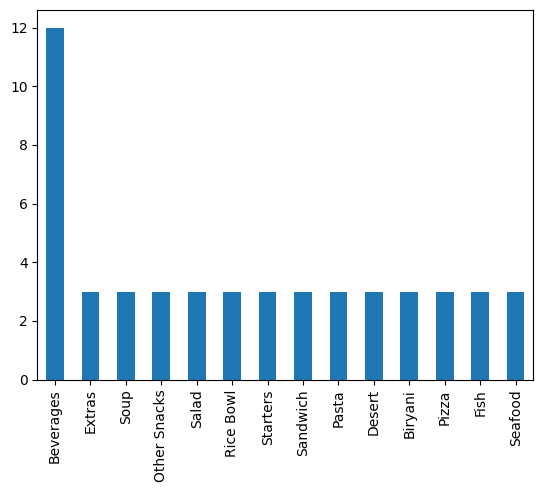

In [ ]:
df_meal['category'].value_counts().plot(kind='bar')

<Axes: ylabel='cuisine'>

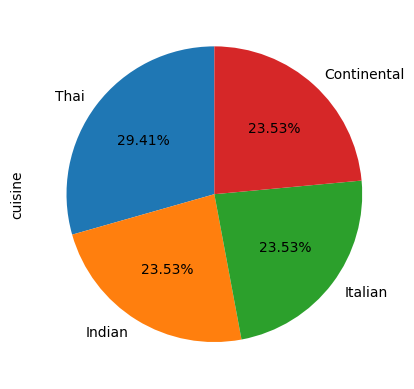

In [ ]:
df_meal['cuisine'].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=90,)

<Axes: >

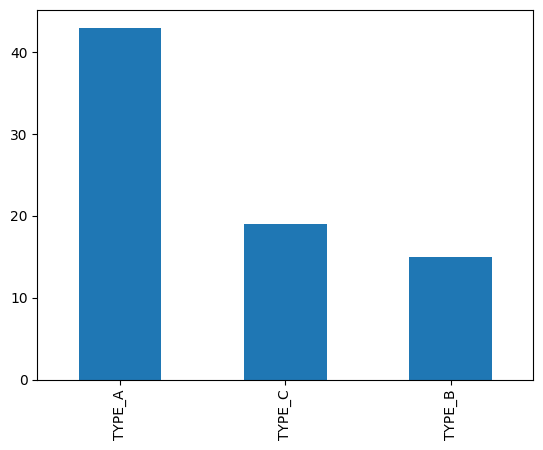

In [ ]:
df_center['center_type'].value_counts().plot(kind='bar')

In [ ]:
# This block of code was writtten by: Ahmed Kashif, Sho Sakane
print("The company  has" ,df_center["center_id"].nunique(), " warehouse " ,
    "spreed into  " ,  df_center["city_code"].nunique() ,"City and ",
    df_center["region_code"].nunique() , "Regions")

print("The products of the company are " ,df_meal["meal_id"].nunique(),"unique meals , devided into  "
,df_meal["category"].nunique(),"category and ",df_meal["cuisine"].nunique(),"cuisine")

The company  has 77  warehouse  spreed into   51 City and  8 Regions
The products of the company are  51 unique meals , devided into   14 category and  4 cuisine


Checking for any duplicate coloumns within our data

In [ ]:
df_train.duplicated(subset=['id'])

0         False
1         False
2         False
3         False
4         False
          ...  
456543    False
456544    False
456545    False
456546    False
456547    False
Length: 456548, dtype: bool

In [ ]:
# This block of code was writtten by: ChernChao Tai
# Select the columns of interest from each dataframe
col1 = 'id'
col2 = 'id'
data1 = df_train[col1]
data2 = df_test[col2]

# Check if the two columns have the same values
if data1.equals(data2):
    print('The two columns have the same values')
else:
    print('The two columns have different values')

The two columns have different values


# **Outliers**


The main Outliers that we found:

#Scatter Plot

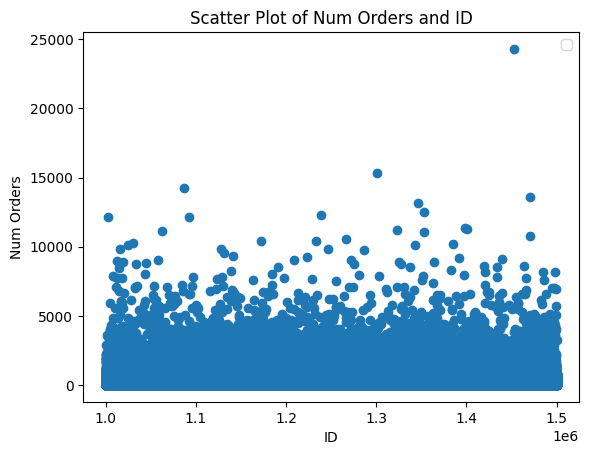

In [ ]:
# This block of code was writtten by: Mohammed Alturki, ChernChao Tai
# calculate z-scores for the num_orders and id columns
z_scores_num_orders = stats.zscore(df_train['num_orders'])
z_scores_id = stats.zscore(df_train['id'])

# identify outliers using a threshold of 3
outliers_num_orders = df_train['num_orders'][abs(z_scores_num_orders) > 3]
outliers_id = df_train['id'][abs(z_scores_id) > 3]

# create a scatter plot of the num_orders and id columns
plt.scatter(df_train['id'], df_train['num_orders'])

# add red circles to indicate outliers

#plt.plot(list(outliers_id.index), outliers_num_orders.values, 'ro', label='Outliers')

# set the chart title and axis labels
plt.title('Scatter Plot of Num Orders and ID')
plt.xlabel('ID')
plt.ylabel('Num Orders')

# show the chart
plt.legend()
plt.show()


# Box Plot

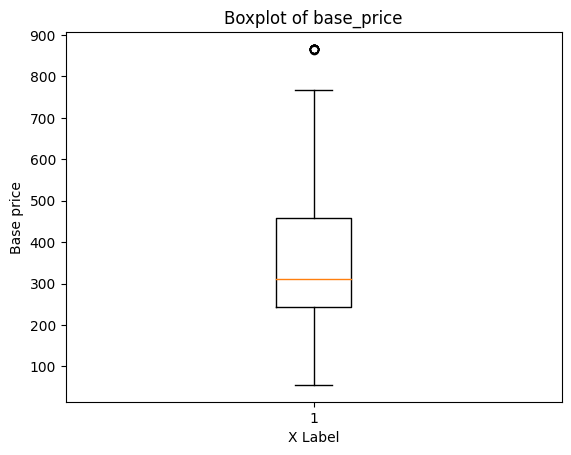

In [ ]:
# This block of code was writtten by: Mohammed Alturki, Sho Sakane
# Select a specific column from the dataframe
column_name = 'base_price'
data = df_train[column_name]
# Create a boxplot using Matplotlib
fig, ax = plt.subplots()
ax.boxplot(data)

# Set the title and labels for the plot
ax.set_title('Boxplot of ' + column_name)
ax.set_xlabel('X Label')
ax.set_ylabel('Base price')

# Show the plot
plt.show()

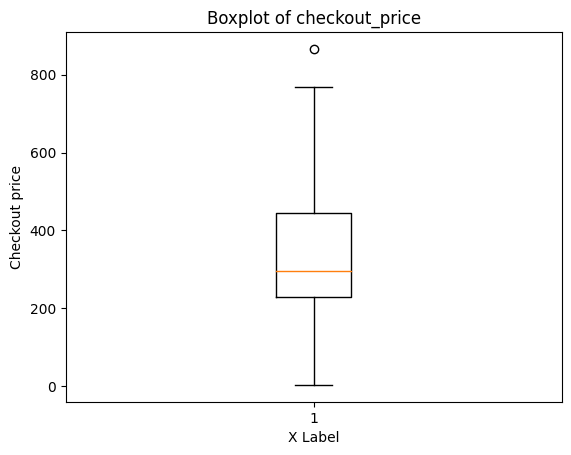

In [ ]:
# This block of code was writtten by: Ahmed Kashif, Sho Sakane
# Select a specific column from the dataframe
column_name = 'checkout_price'
data = df_train[column_name]
# Create a boxplot using Matplotlib
fig, ax = plt.subplots()
ax.boxplot(data)

# Set the title and labels for the plot
ax.set_title('Boxplot of ' + column_name)
ax.set_xlabel('X Label')
ax.set_ylabel('Checkout price')

# Show the plot
plt.show()

##Training our dataset:

Checking for missing values in our train and test dataset


In [ ]:
# This block of code was writtten by: Mohammed Alturki, Ahmed Kashif, ChernChao Tai, Sho Sakane
df_train.isnull().sum().sum()

0

In [ ]:
df_test.isnull().sum().sum()

0

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [ ]:
df_train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [ ]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
df_train.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


# Training 
Meal Cost and Profit
one of the main tasks to analyze the data is to show the which meals is making profit and on the other hand, we found that many c meals that cost more than what it make as shown


In [ ]:
# This block of code was writtten by: Mohammed Alturki, Ahmed Kashif, ChernChao Tai, Sho Sakane

# Calculate profit for each meal
df_train["profit"] = df_train["checkout_price"] - df_train["base_price"]

# Get top 10 meals by profit
top_profit = df_train.nlargest(10, "profit")[["meal_id", "profit"]]
print("Top 10 meals by profit:\n", top_profit)

# Get top 10 meals by loss
top_loss = df_train.nsmallest(10, "profit")[["meal_id", "profit"]]
print("Top 10 meals by loss:\n", top_loss)


Top 10 meals by profit:
         meal_id  profit
328497     1230  185.30
328498     2322  184.30
331762     2322  179.48
327056     2322  174.54
331761     1230  172.60
142172     2126  156.11
78719      2581  146.50
78718      1558  145.50
81758      1558  145.50
81760      1962  145.50
Top 10 meals by loss:
         meal_id  profit
108288     2444 -561.60
287522     2444 -544.20
258834     2304 -510.19
111288     2444 -464.63
262090     2304 -397.64
213435     2444 -397.64
46772      1770 -386.03
268599     2304 -382.21
261380     1543 -374.42
277553     1543 -373.45


Plotting the distribution of base price

Text(0, 0.5, 'Count')

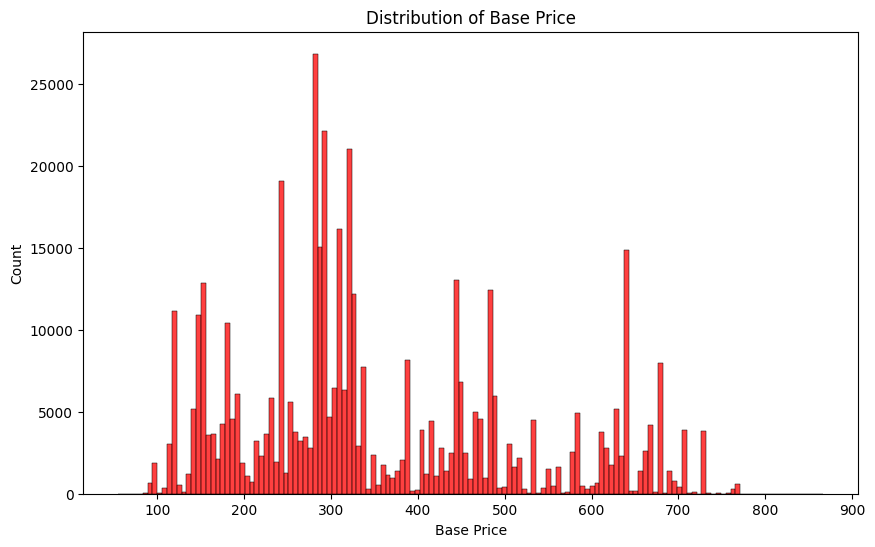

In [ ]:
# This block of code was writtten by: Sho Sakane
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot the histogram for the base_price variable
sns.histplot(df_train['base_price'], color="red")

# Set the title and labels for the plot
plt.title('Distribution of Base Price')
plt.xlabel('Base Price')
plt.ylabel('Count')


Plotting the distribution of checkout price

Text(0, 0.5, 'Count')

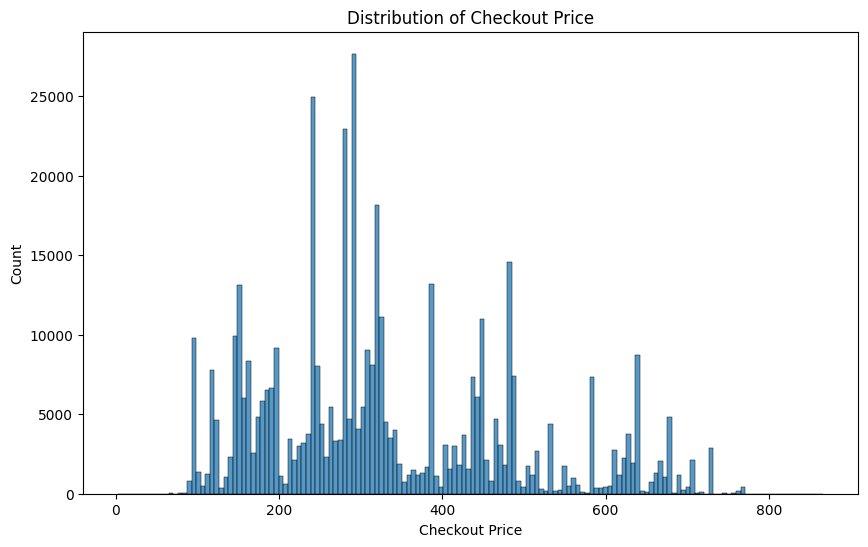

In [ ]:
# This block of code was writtten by: Ahmed Kashif
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot the histogram for the checkout_price variable
sns.histplot(df_train['checkout_price'])

# Set the title and labels for the plot
plt.title('Distribution of Checkout Price')
plt.xlabel('Checkout Price')
plt.ylabel('Count')

# Correlation Matrix

                             id      week  center_id   meal_id  \
id                     1.000000  0.002225   0.002641  0.000488   
week                   0.002225  1.000000  -0.003450  0.019814   
center_id              0.002641 -0.003450   1.000000  0.009893   
meal_id                0.000488  0.019814   0.009893  1.000000   
checkout_price         0.001941  0.026581   0.001348  0.010748   
base_price             0.002909  0.028614   0.000604  0.002605   
emailer_for_promotion  0.002001 -0.000841   0.013658  0.013402   
homepage_featured      0.003111 -0.008263  -0.005043  0.016354   
num_orders             0.000702 -0.017210  -0.053035  0.010597   
profit                -0.003520 -0.010997   0.002247  0.025262   

                       checkout_price  base_price  emailer_for_promotion  \
id                           0.001941    0.002909               0.002001   
week                         0.026581    0.028614              -0.000841   
center_id                    0.001348    0.00

Text(0.5, 1.0, 'Heat map for train data')

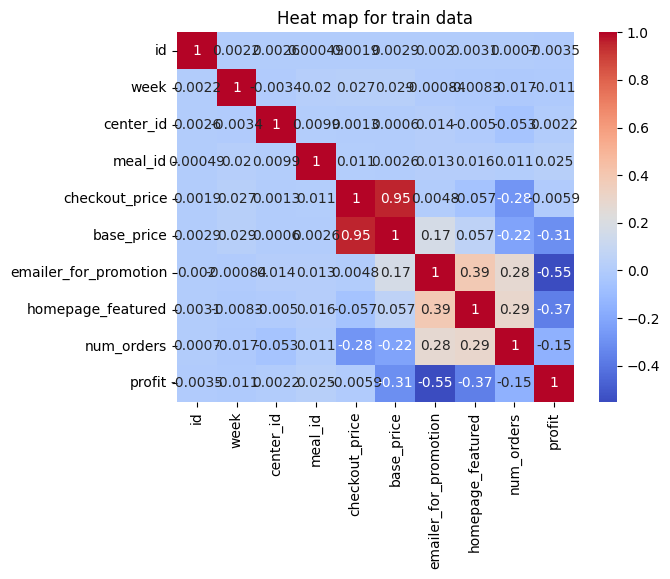

In [ ]:
# This block of code was writtten by: Mohammed Alturki
# Calculate the correlation matrix
corr_matrix = df_train.corr()

# Print the correlation matrix
print(corr_matrix)

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Heat map for train data')



# Box Plot

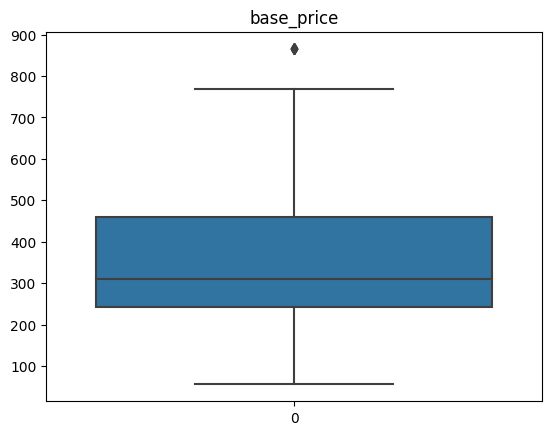

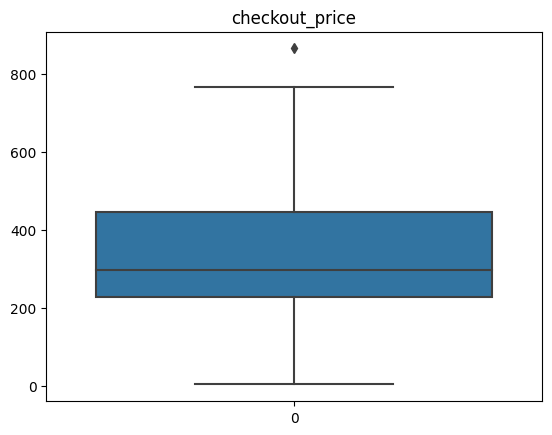

In [ ]:
# This block of code was writtten by: ChernChao Tai
train_num = df_train[['base_price','checkout_price']]
for i in train_num.columns:
    sns.boxplot(train_num[i])
    plt.title(i)
    plt.show()

In [ ]:
#sns.pairplot(df_train)

## One hot encoding

In [ ]:
# This block of code was writtten by: Mohammed Alturki, ChernChao Tai
def one_hot_encode(features_to_encode, dataset):
    encoder = OneHotEncoder(sparse=False)
    encoder.fit(dataset[features_to_encode])

    encoded_cols = pd.DataFrame(encoder.transform(dataset[features_to_encode]),columns=encoder.get_feature_names_out())
    dataset = dataset.drop(columns=features_to_encode)
    for cols in encoded_cols.columns:
        dataset[cols] = encoded_cols[cols]
    return dataset

#df_train = df_train.drop(['id'], axis=1)

#df_train['num_orders'] = df_train['num_orders'].astype('int')
#df_train['base_price'] = df_train['base_price'].astype('int')
#df_train['checkout_price'] = df_train['checkout_price'].astype('int')


In [ ]:
# This block of code was writtten by: Mohammed Alturki, ChernChao Tai
#get list of caterogical varibles in data set
ls = df_train.select_dtypes(include='category').columns.values.tolist()

# Run one-hot encoding on all categorical variables

features_to_encode = ls
#features_to_encode = ['meal_id','city_code',"center_id",'center_type', 'category', 'cuisine']
df_train = one_hot_encode(features_to_encode, df_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Train and Test splitting

In [ ]:
# This block of code was writtten by: Ahmed Kashif, Sho Sakane
X = df_train.drop(['num_orders'], axis=1)
Y = df_train['num_orders']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# This block of code was writtten by: Ahmed Kashif, Sho Sakane
f_train = df_train.loc[:,['num_orders','week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion',
                 'homepage_featured']]
final_train = pd.get_dummies(f_train)
features = final_train.iloc[:,1:].values
label = final_train.iloc[:,:1].values

#Naive Bayes

In [ ]:
# This block of code was writtten by: Mohammed Alturki, ChernChao Tai, Sho Sakane
from sklearn.naive_bayes import GaussianNB

def get_mae2(train_X, val_X, train_y, val_y):
    model = GaussianNB()
    model = model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    score = model.score(val_X, val_y)
    rmse = sqrt(mean_squared_error(val_y, preds_val))
    rmsle = 100*np.sqrt(mean_squared_log_error(val_y, preds_val))

    return mae, score, rmse, rmsle

my_mae, score, rmse, rmsle = get_mae2(X_train, X_test, y_train, y_test)
print("Mean Absolute Error: %f \t Score: %f \t RMSE: %f \t RMSLE: %f" %(my_mae, score, rmse, rmsle))

Mean Absolute Error: 322.800241 	 Score: 0.026810 	 RMSE: 753.874387 	 RMSLE: 193.137862


# Decision Tree

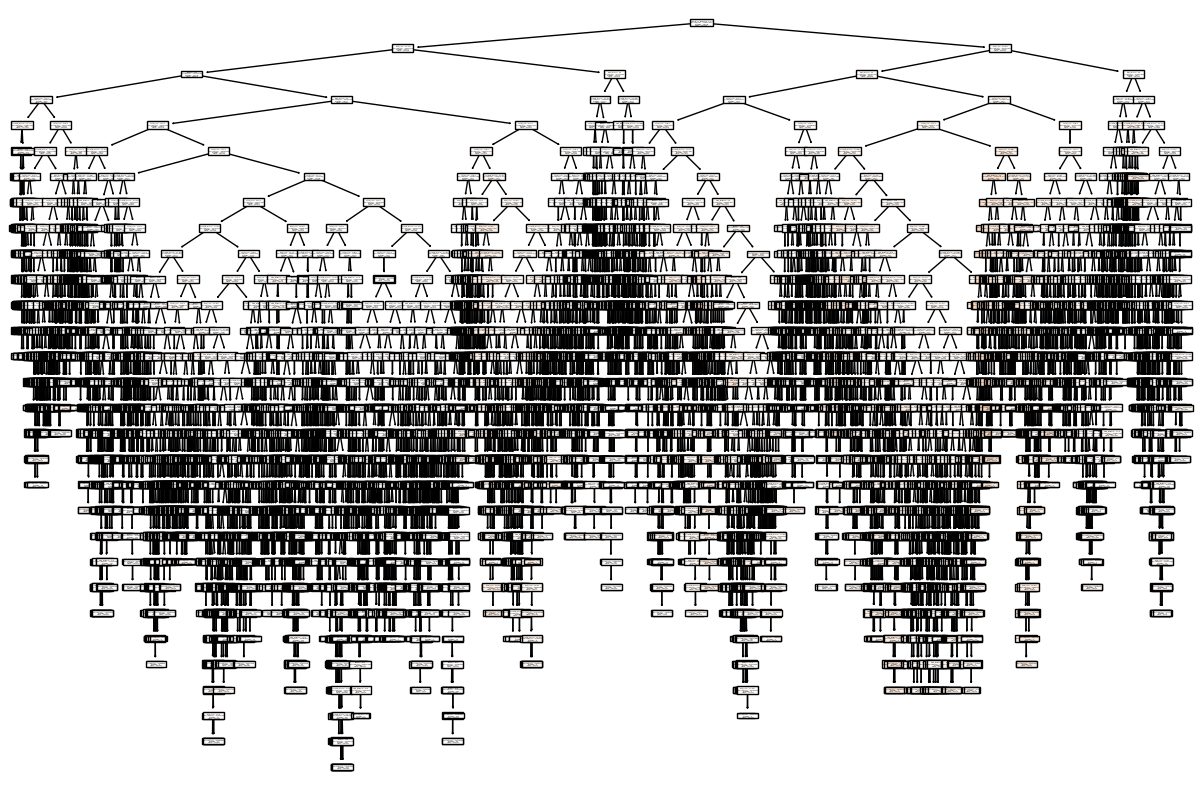

In [ ]:
# This block of code was writtten by: Mohammed Alturki, ChernChao Tai, Sho Sakane
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=1956)
#DTRmodel = DecisionTreeRegressor(max_depth=3,random_state=0)
DTRmodel = DecisionTreeRegressor(max_leaf_nodes=5000,random_state=0)
DTRmodel.fit(X_train,y_train)
y_pred = DTRmodel.predict(X_test)
from sklearn.tree import plot_tree
# Visualize the tree
fig, ax = plt.subplots(figsize=(5, 3))
plot_tree(DTRmodel, filled=True, ax=ax, feature_names=['num_orders','week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured'])
plt.show()

In [ ]:
# This block of code was writtten by: Mohammed Alturki
print("Score: ", DTRmodel.score(X_test, y_test))
print("R2 score  :", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE score  :", mean_squared_error(y_test, y_pred))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("RMSLE: ", 100*np.sqrt(mean_squared_log_error(y_test, y_pred)))

Score:  0.6604082341445572
R2 score  : 0.6604082341445572
MAE:  95.6072139638385
MSE score  : 50939.26868205076
RMSE:  225.6972943613874
RMSLE:  64.66296207807295


#Random Forest

In [ ]:
# This block of code was writtten by: Mohammed Alturki, Ahmed Kashif
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=33)
RFRmodel = RandomForestRegressor(max_depth=18, random_state=0)
RFRmodel.fit(X_train,y_train)
y_pred = RFRmodel.predict(X_test)

<ipython-input-40-b5bfe6a7d4f6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFRmodel.fit(X_train,y_train)


In [ ]:
# This block of code was writtten by: Mohammed Alturki
print("Score: ", RFRmodel.score(X_test, y_test))
print("R2 score  :", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE score  :", mean_squared_error(y_test, y_pred))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("RMSLE: ", 100*np.sqrt(mean_squared_log_error(y_test, y_pred)))

Score:  0.7759958786720349
R2 score  : 0.7759958786720349
MAE:  86.20499185447521
MSE score  : 33150.27041893595
RMSE:  182.0721571765874
RMSLE:  58.7970180982639


In [ ]:
# This block of code was writtten by: ChernChao Tai, Sho Sakane
def center_id(datacol):
    center_id_val_index_n = []
    for i in datacol:
        if i >= 10 and i <= 30:
            center_id_val_index_n.append("10-30")
        elif i >= 31 and i <=50:
            center_id_val_index_n.append("31-50")
        elif i >= 51 and i <=70:
            center_id_val_index_n.append("51-70")  
        elif i >= 71 and i <=90:
            center_id_val_index_n.append("71-90")
        elif i >= 91 and i <=110:
            center_id_val_index_n.append("91-110") 
        elif i >= 111 and i <=130:
            center_id_val_index_n.append("111-130")
        elif i >= 131 and i <=150:
            center_id_val_index_n.append("131-150")          
        else:
            center_id_val_index_n.append("151-190")
    
    return  center_id_val_index_n 
center_id_val_index_n = center_id(df_train.center_id) 
df_train.center_id = center_id_val_index_n

def meal_id(datacol):        
    meal_id_val_index_n = []
    for i in datacol:
        if i >= 1000 and i <= 1300:
            meal_id_val_index_n.append("1000-1300")
        elif i >= 1301 and i <=1600:
            meal_id_val_index_n.append("1301-1600")
        elif i >= 1601 and i <=1900:
            meal_id_val_index_n.append("1601-1900")  
        elif i >= 1901 and i <=2200:
            meal_id_val_index_n.append("1901-2200")
        elif i >= 2201 and i <=2500:
            meal_id_val_index_n.append("2201-2500") 
        elif i >= 2501 and i <=2800:
            meal_id_val_index_n.append("2501-2800")          
        else:
            meal_id_val_index_n.append("2801-3000") 
    return  meal_id_val_index_n

meal_id_val_index_n = meal_id(df_train.meal_id)
df_train.meal_id = meal_id_val_index_n

In [ ]:
# This block of code was writtten by: Ahmed Kashif, Sho Sakane
center_id_val_index_n = center_id(df_test.center_id) 
df_test.center_id = center_id_val_index_n

meal_id_val_index_n = meal_id(df_test.meal_id)
df_test.meal_id = meal_id_val_index_n

In [ ]:
# This block of code was writtten by: ChernChao Tai
f_test = df_test.loc[:,['week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured']]
final_test = pd.get_dummies(f_test)

In [ ]:
# This block of code was writtten by: Mohammed Alturki, ChernChao Tai
test_predict = DTRmodel.predict(final_test.iloc[:, :7])
print(test_predict)

[263.25882353 263.25882353 263.25882353 ... 221.11764706 221.11764706
 221.11764706]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# This block of code was writtten by: Mohammed Alturki
df_test['num_orders'] = test_predict

a

In [ ]:
# This block of code was writtten by: Mohammed Alturki
sample =  df_test.loc[:,['id','num_orders']]
sample.to_csv('test_sample.csv',index=False)
print(sample.shape)
display(sample)

(32573, 2)


,id,num_orders
0,1028232,263.258824
1,1127204,263.258824
2,1212707,263.258824
3,1082698,263.258824
4,1400926,263.258824
...,...,...
32568,1250239,221.117647
32569,1039516,221.117647
32570,1158107,221.117647
32571,1444235,221.117647


In [ ]:
sample.tail()

,id,num_orders
32568,1250239,221.117647
32569,1039516,221.117647
32570,1158107,221.117647
32571,1444235,221.117647
32572,1291286,221.117647
